# Analisis Setoran Sholawat

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

## Load Dataset

In [2]:
df = pd.read_csv('http://bit.ly/sholawat-csv')

In [3]:
df.head()

,Timestamp,nama-tgl,Nama,Tanggal Bacaan,Jumlah Sholawat
0,02/10/2020 17:39:28,Maya44106,Maya,02/10/2020,3.003
1,02/10/2020 18:09:24,Miya44106,Miya,02/10/2020,5.000
2,02/10/2020 17:19:13,Ulil44106,Ulil,02/10/2020,1.400
3,02/10/2020 17:20:25,Uuz44106,Uuz,02/10/2020,1.525
4,02/10/2020 17:42:49,Yumi44106,Yumi,02/10/2020,1.000


In [4]:
print(f'Ukuran dataset: {df.shape[0]} baris dan {df.shape[1]} kolom')

Ukuran dataset: 979 baris dan 5 kolom


Penjelasan dataset:

<ul>
    <li><b>Timestamp</b>: tanggal pengisian data</li>
    <li><b>nama-tgl</b>: penggabungan kolom Nama dan Tanggal Bacaan</li>
    <li><b>Nama</b>: nama penyetor</li>
    <li><b>Tanggal Bacaan</b>: tanggal bacaan sholawat</li>
    <li><b>Jumlah Sholawat</b>: jumlah bacaan sholawat</li>
</ul>

Penting diketahui bahwa tanggal bacaan sholawat dengan tanggal pengisian data bisa berbeda, mereka bisa mengisi data untuk beberapa tanggal bacaan sholawat sekaligus dalam sehari yang bisa diakibatkan oleh keterlambatan pengisian data.

## Data Preparation

Sebelum melanjutkan proses analisa, perlu untuk dilakukan data preparation atau data cleaning terlebih dahulu untuk memastikan data yang digunakan sudah sesuai dengan format yang diinginkan dan hapus data yang tidak diperlukan.

#### Drop Useless Column

Langkah pertama, hapus kolom <b>nama-tgl</b> karena bisa jadi data <i>redundant</i>.

In [5]:
# drop 'nama-tgl' column
df.drop(columns='nama-tgl', axis=1, inplace=True)
print(f'Ukuran dataset: {df.shape[0]} baris dan {df.shape[1]} kolom')

Ukuran dataset: 979 baris dan 4 kolom


#### Check Duplicates Values

Tahap selanjutnya adalah melakukan inspeksi data duplikat (<i>duplicate values</i>) dengan menggunakan fungsi <code>.duplicated()</code>

In [6]:
# check duplicate rows
df[df.duplicated() == True]

,Timestamp,Nama,Tanggal Bacaan,Jumlah Sholawat


Pada saat melakukan pengecekan duplikasi data baris untuk seluruh kolom, tidak ditemukan adanya duplikasi data karena kolom <b>Timestamp</b> adalah nilai unik yang otomatis terisi ketika anggota mensubmit form setoran bacaan, dengan kata lain jumlah nilai unik pada kolom Timestamp sebanyak jumlah baris pada dataset. Hal ini bisa dilihat dengan menampilkan nilai unik setiap kolom dengan fungsi <code>.nunique()</code>

In [7]:
df.nunique()

Timestamp          979
Nama                 7
Tanggal Bacaan     158
Jumlah Sholawat    166
dtype: int64

Jumlah nilai unik pada kolom <b>Timestamp</b> sama dengan jumlah baris pada dataset yaitu 876.

Apakah bisa ada kemungkinan bahwa ada data duplikasi yang bisa mempengaruhi proses analisa? tentu ada, yaitu kondisi dimana anggota mengisi setoran untuk tanggal yang sama dengan jumlah yang sama (double input atau double submit ketika halaman di muat ulang). Pengecekan duplikasi bisa dilakukan dengan menyeleksi kolom yang diisi manual oleh anggota, yaitu kolom <b>Nama</b>, <b>Tanggal Bacaan</b>, dan <b>Jumlah Sholawat</b>.

In [8]:
# check duplicate in 'Nama', 'Tanggal Bacaan', 'Jumlah Sholawat' columns, it can be double input
df[df[['Nama','Tanggal Bacaan', 'Jumlah Sholawat']].duplicated() == True].sort_values('Nama')

,Timestamp,Nama,Tanggal Bacaan,Jumlah Sholawat


Pada dataset kali ini, tidak ada data duplikasi karena sudah dibersihkan manual di spreadsheet. Namun proses penghapusan duplikasi data tetap bisa dilakukan jika suatu saat nanti data bertambah banyak dan tidak ada kesempatan untuk membersihkan manual dari spreadsheet. Gunakan fungsi <code>.drop_duplicates()</code> untuk menghapus data duplikat.

In [9]:
# drop duplicate values in rows
df.drop_duplicates()

# drop duplicates data with same value in 'Nama', 'Tanggal Bacaan', 'Jumlah Sholawat' columns
df[['Nama', 'Tanggal Bacaan', 'Jumlah Sholawat']].drop_duplicates()

# check shape of data after drop duplicate values
print(f'Ukuran dataset setelah hapus duplikat: {df.shape[0]} baris dan {df.shape[1]} kolom')

Ukuran dataset setelah hapus duplikat: 979 baris dan 4 kolom


Jumlah baris masih sama dengan dataset asli yaitu 876 baris karena tidak ada data duplikat pada dataset ini.

#### Check Mising Values

Tahapan berikutnya adalah pengecekan kekosongan data (<i>missing values</i>) dengan fungsi <code>.isnull()</code>

In [10]:
df.isnull().sum()

Timestamp          0
Nama               0
Tanggal Bacaan     0
Jumlah Sholawat    0
dtype: int64

Dataset yang digunakan tidak memiliki <i>missing values</i> karena pada form pengisian setoran sholawat terdapat requirement pada setiap inputan kolom yang artinya semua data wajib terisi dan disesuaikan dengan format yang sudah ditentukan.

#### Convert Datatypes

Tidak menutup kemungkinan kesalahan format data bisa terjadi pada data dari form tersebut seperti penambahan tanda titik pada kolom <b>Jumlah Sholawat</b>, hal ini dapat menyebabkan format data yang dibaca oleh pandas berbeda, seharusnya tipe integer namun terbaca float. Hal itu bisa dideteksi dengan melakukan pengecekan tipe data dengan fungsi <code>.info()</code>.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        979 non-null    object 
 1   Nama             979 non-null    object 
 2   Tanggal Bacaan   979 non-null    object 
 3   Jumlah Sholawat  979 non-null    float64
dtypes: float64(1), object(3)
memory usage: 30.7+ KB


Pada dataset terdapat 2 kolom tanggal yang seharusnya bertipe <i>datetime</i>, yaitu kolom <b>Timestamp</b> dan <b>Tanggal Bacaan</b>. Lakukan konversi ke tipe data datetime untuk kedua kolom tersebut dengan fungsi <code>.to_datetime()</code> pandas.

In [12]:
# convert datetime columns
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True)
df['Tanggal Bacaan'] = pd.to_datetime(df['Tanggal Bacaan'], dayfirst=True)

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        979 non-null    datetime64[ns]
 1   Nama             979 non-null    object        
 2   Tanggal Bacaan   979 non-null    datetime64[ns]
 3   Jumlah Sholawat  979 non-null    float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 30.7+ KB


Pada kolom <b>Jumlah Sholawat</b> seharusnya berisi data integer dimana angka ribuan atau lebih tidak menggunakan tanda titik (.), bersihkan data pada kolom tersebut kemudian convert data menjadi integer menggunakan <code>.astype()</code>

In [13]:
# create function to fix the format
def float_to_int(data):
    if data <= 0:
        data = 0
    elif data < 10:
        data = data * 1000
    else:
        pass
    return data

# assign function and convert the datatype
df['Jumlah Sholawat'] = df['Jumlah Sholawat'].apply(lambda x: float_to_int(x)).astype('int64')

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        979 non-null    datetime64[ns]
 1   Nama             979 non-null    object        
 2   Tanggal Bacaan   979 non-null    datetime64[ns]
 3   Jumlah Sholawat  979 non-null    int64         
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 30.7+ KB


#### Result

Kita lihat hasil akhir data proccessing pada dataset dengan fungsi <code>.head</code>

In [14]:
df.head()

,Timestamp,Nama,Tanggal Bacaan,Jumlah Sholawat
0,2020-10-02 17:39:28,Maya,2020-10-02,3003
1,2020-10-02 18:09:24,Miya,2020-10-02,5000
2,2020-10-02 17:19:13,Ulil,2020-10-02,1400
3,2020-10-02 17:20:25,Uuz,2020-10-02,1525
4,2020-10-02 17:42:49,Yumi,2020-10-02,1000


## Data Analysis

Untuk mempermudah proses analisis, tambahkan kolom <b>Bulan</b> dan <b>Tanggal</b> yang didapat dari kolom <b>Tanggal Bacaan</b> sebagai acuan analisa data

In [15]:
df['Bulan'] = df['Tanggal Bacaan'].apply(lambda x: str(x)[:7])
df['Tanggal'] = df['Tanggal Bacaan'].dt.dayofweek
df.head()

,Timestamp,Nama,Tanggal Bacaan,Jumlah Sholawat,Bulan,Tanggal
0,2020-10-02 17:39:28,Maya,2020-10-02,3003,2020-10,4
1,2020-10-02 18:09:24,Miya,2020-10-02,5000,2020-10,4
2,2020-10-02 17:19:13,Ulil,2020-10-02,1400,2020-10,4
3,2020-10-02 17:20:25,Uuz,2020-10-02,1525,2020-10,4
4,2020-10-02 17:42:49,Yumi,2020-10-02,1000,2020-10,4


### Plot berdasarkan bulan

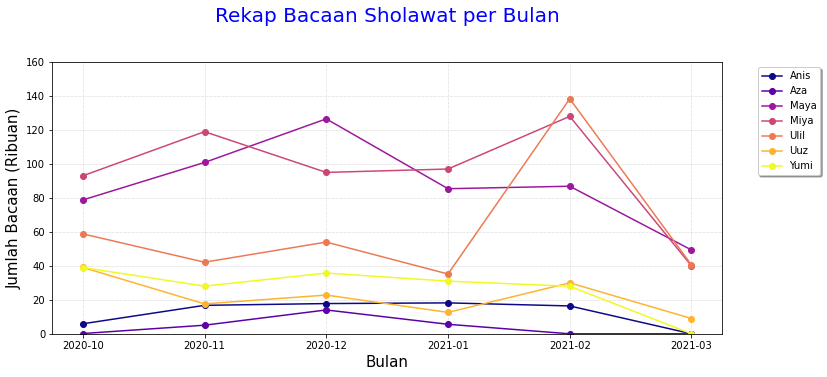

In [16]:
df_month_group = df.groupby(['Bulan', 'Nama'])['Jumlah Sholawat'].sum().unstack().fillna(0)

df_month_group.plot(marker='o', cmap='plasma') # custom line
plt.title('Rekap Bacaan Sholawat per Bulan', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Bulan', fontsize=15)
plt.ylabel('Jumlah Bacaan (Ribuan)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))
plt.ylim(0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.show()

In [17]:
print('Jumlah bacaan pada bulan Desember 2020\n', df_month_group[df_month_group.index == '2020-12'])
ulil = df_month_group['Ulil']
print('\nSelisih jumlah bacaan Ulil pada bulan Januari dan Februari sebanyak', ulil[-1] - ulil[-2], 
      'atau sekitar', round((ulil[-1] - ulil[-2]) / ulil[-2] * 100),'%')

Jumlah bacaan pada bulan Desember 2020
 Nama        Anis      Aza      Maya     Miya     Ulil      Uuz     Yumi
Bulan                                                                  
2020-12  17800.0  14040.0  126523.0  95000.0  54000.0  22800.0  35760.0

Selisih jumlah bacaan Ulil pada bulan Januari dan Februari sebanyak -97850.0 atau sekitar -71.0 %


<b>Kesimpulan</b>:
<ul>
    <li>Jumlah bacaan tertinggi yaitu bulan Desember 2020 pada setoran Maya sebanyak <b>126.523</b> bacaan</li>
    <li>Terjadi peningkatan yang signifikan pada jumlah bacaan Ulil pada bulan Februari sebanyak <b>83150</b> bacaan atau sekitar <b>236%</b> dari bulan sebelumnya</li>
    <li>Jumlah bacaan untuk Miya cenderung fluktuatif (naik-turun), mengalami penurunan jumlah setoran di bulan Desember dan mulai meningkat lagi di bulan berikutnya.</li>
    <li>Tidak ada data setoran Aza untuk bulan Februari</li>
    <li>Sedangkan jumlah bacaan per bulan untuk anggota lainnya cenderung menurun pada bulan Januari dan Februari.</li>
    <li>Pola jumlah bacaan Yumi dan Uuz cenderung sama</li>
</ul>

### Plot berdasarkan minggu

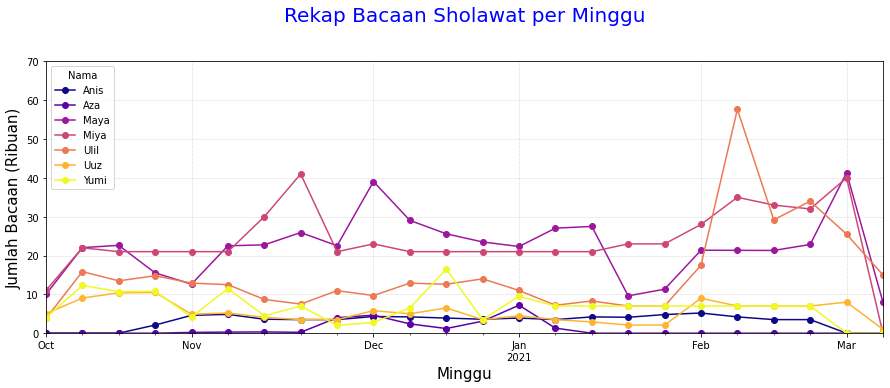

In [18]:
df_week_group = df.groupby(['Tanggal Bacaan', 'Nama'])['Jumlah Sholawat'].sum().unstack().fillna(0)

df_week_group.resample('W').sum().plot(marker='o', cmap='plasma') # custom line
plt.title('Rekap Bacaan Sholawat per Minggu', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Minggu', fontsize=15)
plt.ylabel('Jumlah Bacaan (Ribuan)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))
plt.ylim(0)
plt.gcf().set_size_inches(15, 5)
plt.show()

<b>Kesimpulan</b>: 
<ul>
    <li>Lonjakan jumlah setor bacaan Ulil tertinggi terjadi pada minggu ke-2 bulan Februari, dan itu adalah jumlah bacaan tertinggi sejauh pencatatan ini dilakukan</li>
    <li>Jumlah bacaan pada minggu terakhir mengalami penurunan setiap bulannya</li>
    <li>Terlihat bahwa jumlah setor bacaan Aza bernilai 0 sejak minggu ketiga Januari</li>
</ul>

### Plot berdasarkan hari

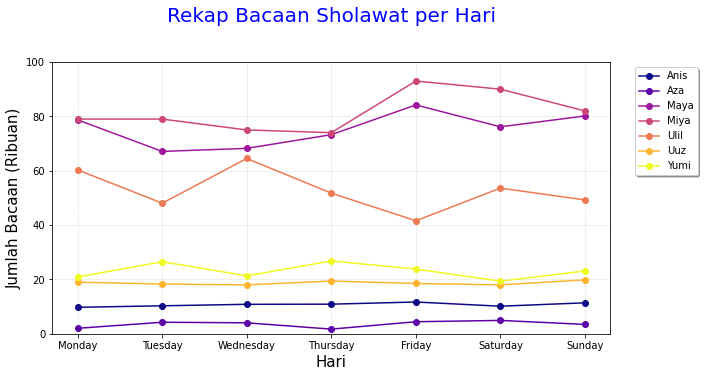

In [19]:
df_day_group = df.groupby(['Tanggal', 'Nama'])['Jumlah Sholawat'].sum().unstack().fillna(0)
df_day_group['days'] = list(calendar.day_name)
df_day_group = df_day_group.reset_index().set_index('days').drop(columns='Tanggal', axis=1)

df_day_group.plot(marker='o', cmap='plasma') # custom line
plt.title('Rekap Bacaan Sholawat per Hari', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Hari', fontsize=15)
plt.ylabel('Jumlah Bacaan (Ribuan)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))
plt.ylim(0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(10, 5)
plt.show()

In [20]:
def max_val_days(data, nama):
    max_val = data[nama].max()
    hari = data[nama].loc[(data == max_val).any(axis=1)].index.tolist()
    return max_val, hari

for nama in df_day_group.columns:
    result = max_val_days(df_day_group, nama)
    print(f'Setoran tertinggi {nama}: {result[0]}, pada hari {result[1]}')

Setoran tertinggi Anis: 11700, pada hari ['Friday']
Setoran tertinggi Aza: 4920, pada hari ['Saturday']
Setoran tertinggi Maya: 84196, pada hari ['Friday']
Setoran tertinggi Miya: 93000, pada hari ['Friday']
Setoran tertinggi Ulil: 64500, pada hari ['Wednesday']
Setoran tertinggi Uuz: 19850, pada hari ['Sunday']
Setoran tertinggi Yumi: 26810, pada hari ['Thursday']


<b>Kesimpulan</b>: 

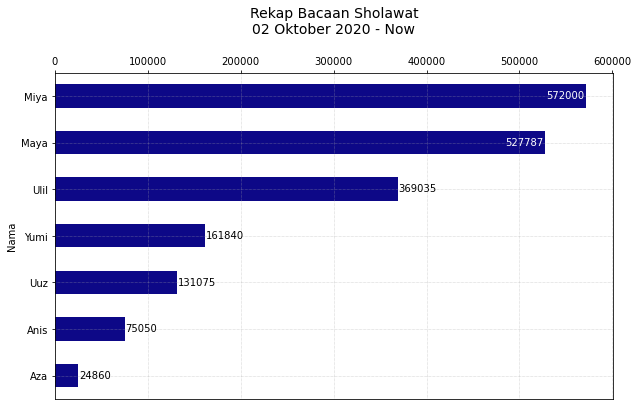

In [21]:
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

df_sum = df.groupby('Nama')['Jumlah Sholawat'].sum().sort_values(ascending=True)
ax = df_sum.plot(kind='barh', cmap='plasma')

plt.title('Rekap Bacaan Sholawat\n02 Oktober 2020 - Now\n', fontsize=14)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

for p in ax.patches:
    if p.get_width() > 500000:
        x = p.get_x() + p.get_width() - 43000
        color = 'white'
    else:
        x = p.get_x() + p.get_width() + 1000
        color = 'black'
    y = p.get_y() + p.get_height()/2.5
    ax.annotate(p.get_width(), (x, y), color=color)
plt.gcf().set_size_inches(10, 6)
plt.show()